# Economic Growth Prediction using multiple Linear Regression

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load dataset
df =pd.read_csv(r"C:\Users\pc\Desktop\Global Economy Indicator\economy_data.csv.csv")
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [7]:
print(df.columns.tolist())

[' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ', ' IMF based exchange rate ', ' Population ', ' Currency ', ' Per capita GNI ', ' Agriculture, hunting, forestry, fishing (ISIC A-B) ', ' Changes in inventories ', ' Construction (ISIC F) ', ' Exports of goods and services ', ' Final consumption expenditure ', ' General government final consumption expenditure ', ' Gross capital formation ', ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ', ' Household consumption expenditure (including Non-profit institutions serving households) ', ' Imports of goods and services ', ' Manufacturing (ISIC D) ', ' Mining, Manufacturing, Utilities (ISIC C-E) ', ' Other Activities (ISIC J-P) ', ' Total Value Added ', ' Transport, storage and communication (ISIC I) ', ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ', ' Gross National Income(GNI) in USD ', ' Gross Domestic Product (GDP) ']


In [8]:
df.columns = df.columns.str.strip()

In [9]:
cols = [
    'Country', 
    'Year',
    'Population',
    'Gross National Income(GNI) in USD',
    'Imports of goods and services',
    'Exports of goods and services',
    'Gross capital formation',
    'Gross Domestic Product (GDP)'
        ]

data = df[cols].copy()
data.head()


,Country,Year,Population,Gross National Income(GNI) in USD,Imports of goods and services,Exports of goods and services,Gross capital formation,Gross Domestic Product (GDP)
0,Afghanistan,1970,10752971,1.766528e+09,195277226.0,165618722.0,94611818.0,1.731436e+09
1,Afghanistan,1971,11015857,1.850122e+09,276296480.0,193580300.0,99012350.0,1.812838e+09
2,Afghanistan,1972,11286753,1.683948e+09,290370350.0,227654380.0,103456794.0,1.647900e+09
3,Afghanistan,1973,11575305,1.739998e+09,262962880.0,226913554.0,121728433.0,1.702716e+09
4,Afghanistan,1974,11869879,2.106420e+09,305679151.0,284938449.0,175061875.0,2.061729e+09


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   CountryID                                                                                 10512 non-null  int64  
 1   Country                                                                                   10512 non-null  object 
 2   Year                                                                                      10512 non-null  int64  
 3   AMA exchange rate                                                                         10512 non-null  float64
 4   IMF based exchange rate                                                                   10512 non-null  float64
 5   Population                                           

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.039100e+04,8.671000e+03,1.051200e+04,1.049100e+04,...,1.046000e+04,1.047000e+04,1.046900e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.046300e+04,1.046300e+04,1.051200e+04,1.051200e+04
mean,431.116629,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,251.169090,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.034349e+10,8.932353e+09,4.985596e+10,1.748857e+11,...,6.038454e+11,1.804351e+11,1.723910e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.187359e+10,1.391727e+11,9.942144e+11,9.845997e+11
min,4.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,212.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.304522e+08,4.673545e+05,6.815523e+07,4.026725e+08,...,9.389897e+08,5.891469e+08,1.109497e+08,1.857038e+08,3.555891e+08,1.355670e+09,8.998828e+07,2.078732e+08,1.410772e+09,1.439217e+09
50%,430.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.313674e+08,6.829635e+07,3.717701e+08,2.407906e+09,...,5.154424e+09,2.891919e+09,9.113543e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.441500e+08,1.056493e+09,7.887233e+09,8.070572e+09
75%,643.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.023326e+09,6.910750e+08,2.815730e+09,1.542492e+10,...,3.008905e+10,1.602312e+10,7.405364e+09,1.251358e+10,1.442130e+10,4.819144e+10,3.975893e+09,6.707456e+09,5.005789e+10,5.172596e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


## Exploratory Data Analysis

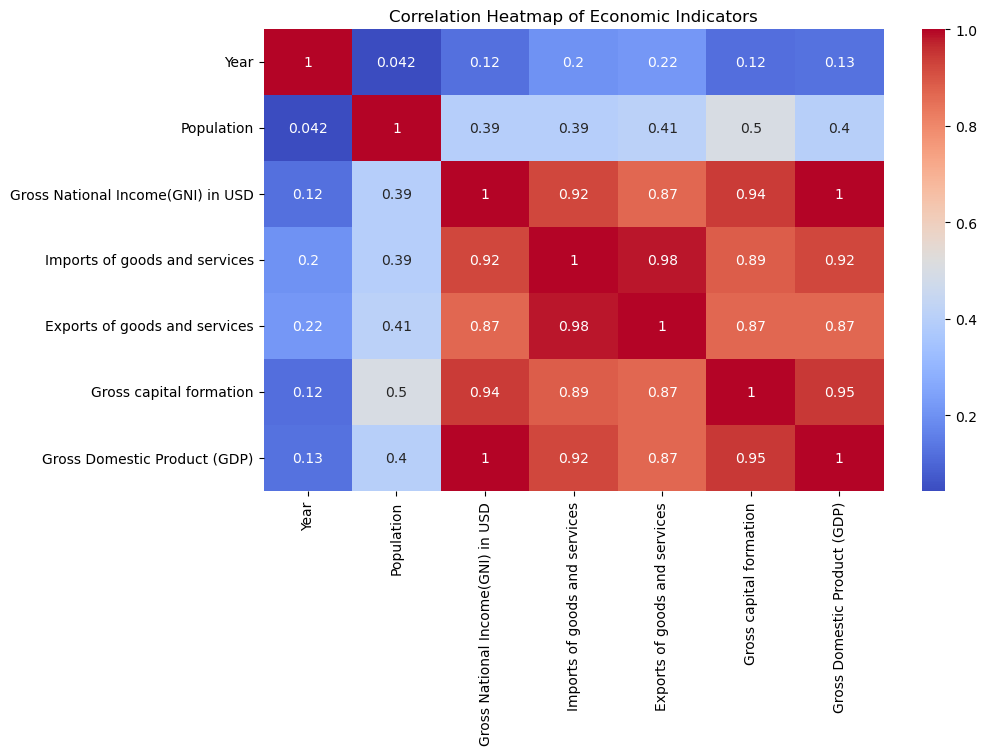

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Economic Indicators")
plt.show()


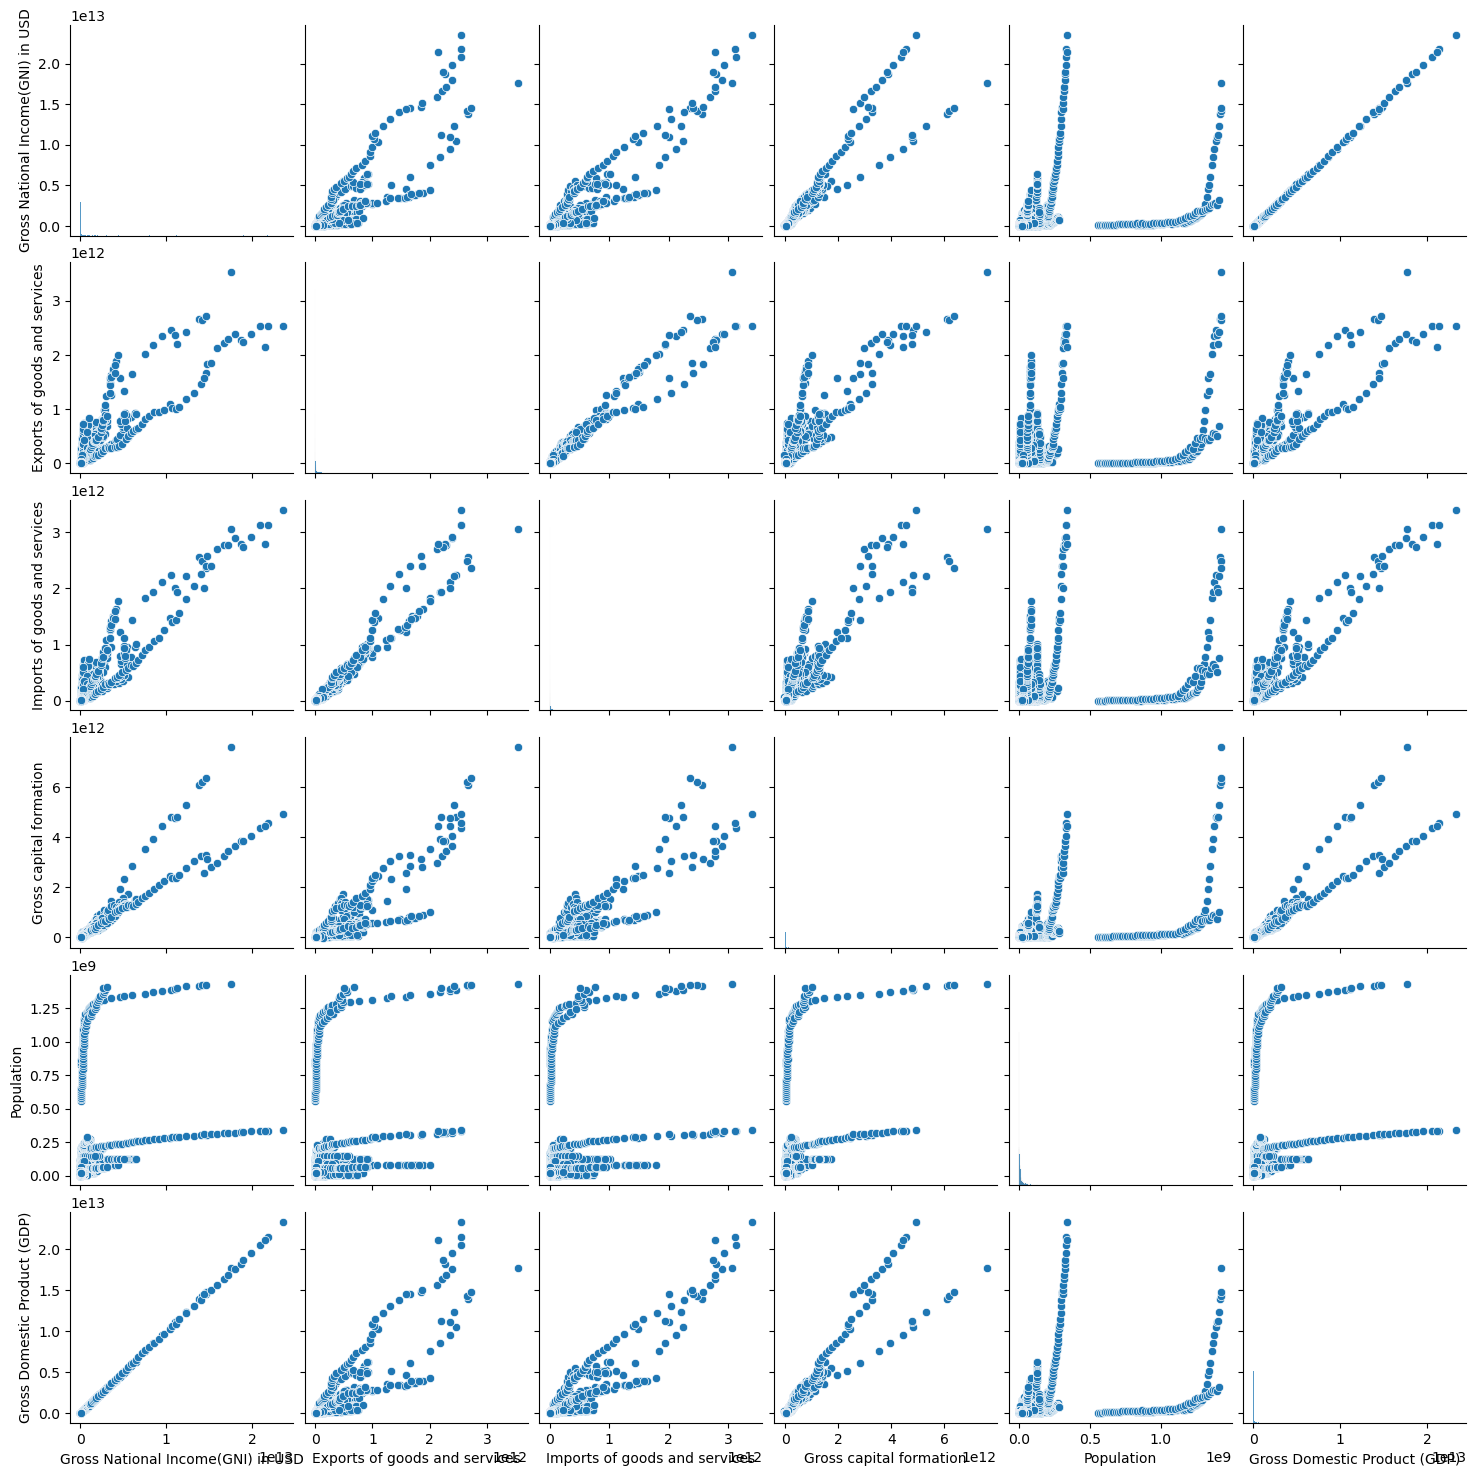

In [12]:
sns.pairplot(data[['Gross National Income(GNI) in USD',
                   'Exports of goods and services',
                   'Imports of goods and services',
                   'Gross capital formation',
                   'Population',
                   'Gross Domestic Product (GDP)']])
plt.show()

## Regression Model Building

#### Target (dependent variable) = GDP
#### Independent variables = GNI, Imports, Exports, Gross capital formation, Population

In [14]:
X = data[['Gross National Income(GNI) in USD',
          'Imports of goods and services',
          'Exports of goods and services',
          'Gross capital formation',
          'Population']]

y = data['Gross Domestic Product (GDP)']


#### Fixing missing values error

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

##### Splitting data into Training and testing parts

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

#### Training Model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)           

LinearRegression()

#### Predicting

In [19]:
y_pred = model.predict(X_test)         # predict
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

#### Evaluating

In [20]:
print("R^2:", r2)
print("MSE:", mse)
print("Intercept:", model.intercept_)

R^2: 0.9998205456255187
MSE: 1.4654372965258922e+20
Intercept: 1344433454.7945557


#### Showing Coefficients

In [58]:
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
print("\nCoefficients (sorted by absolute value):")
print(coef_df.assign(abs_coef=coef_df.coefficient.abs()).sort_values('abs_coef', ascending=False).drop(columns='abs_coef').to_string(index=False))

R^2: 0.9998205456255187
MSE: 1.4654372965258922e+20
Intercept: 1344433454.7945557

Coefficients (sorted by absolute value):
                          feature  coefficient
                       Population    18.113843
Gross National Income(GNI) in USD     0.971931
          Gross capital formation     0.058827
    Exports of goods and services     0.012632
    Imports of goods and services     0.008200


## Calculating Residuals

Residuals represent the difference between actual and predicted values.Analyzing them helps check whether the model’s assumptions hold true and if the model fits the data well. When residuals are randomly scattered around zero, it indicates that the regression model is reliable and unbiased.

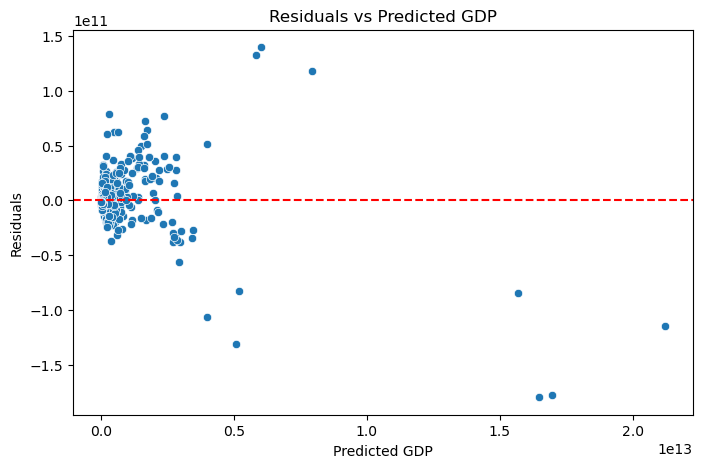

In [59]:
# Predict GDP values from the model
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted GDP")
plt.xlabel("Predicted GDP")
plt.ylabel("Residuals")
plt.show()

## Check if residuals are normal

Checking if residuals are normally distributed ensures that the regression model’s predictions are unbiased and statistically reliable. It confirms that the model assumptions hold true, making the analysis more accurate and trustworthy.

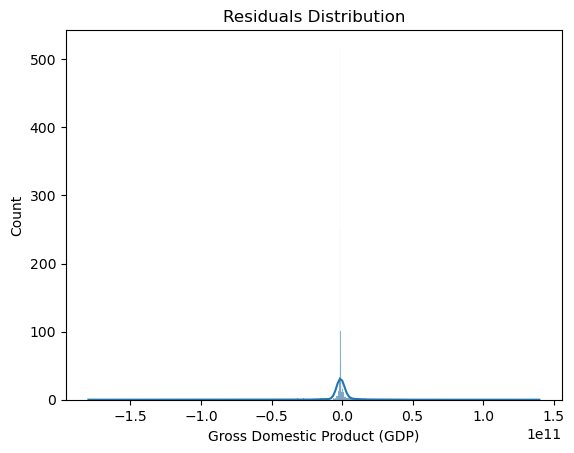

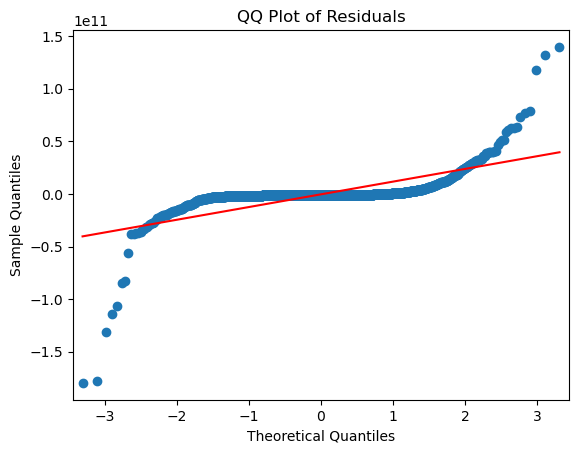

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - y_pred

# 1️⃣ Histogram + KDE
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# 2️⃣ QQ-plot (check if points fall roughly on the line)
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()


## Visualization Summary

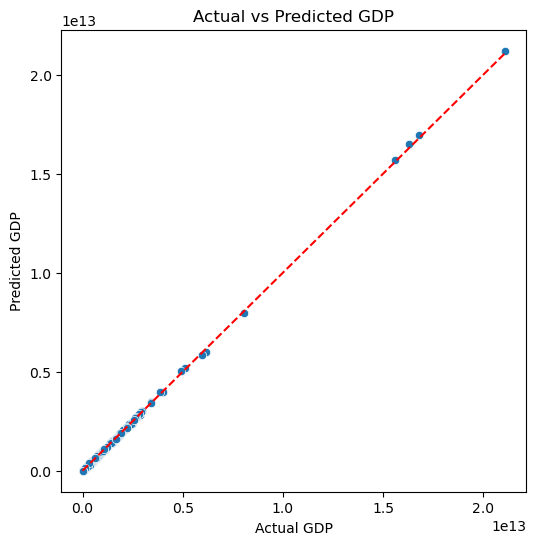

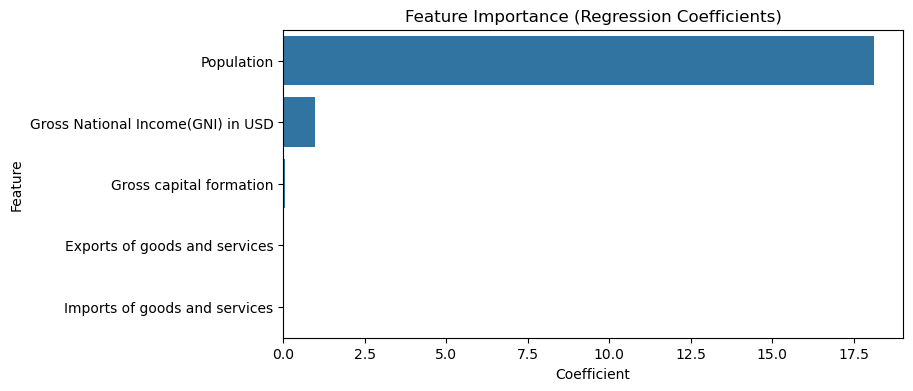

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Actual vs Predicted GDP
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Actual vs Predicted GDP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# 2️⃣ Feature Importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title("Feature Importance (Regression Coefficients)")
plt.show()
